# Loading Data

In [1]:
import pandas as pd

# Load the provided Excel file
file_path = './PSP_Jan_Feb_2019.xlsx'
data = pd.read_excel(file_path)

# Display the first few rows of the dataset to understand its structure and contents
data.head()


,Unnamed: 0,tmsp,country,amount,success,PSP,3D_secured,card
0,0,2019-01-01 00:01:11,Germany,89,0,UK_Card,0,Visa
1,1,2019-01-01 00:01:17,Germany,89,1,UK_Card,0,Visa
2,2,2019-01-01 00:02:49,Germany,238,0,UK_Card,1,Diners
3,3,2019-01-01 00:03:13,Germany,238,1,UK_Card,1,Diners
4,4,2019-01-01 00:04:33,Austria,124,0,Simplecard,0,Diners


# Data Quality Checks

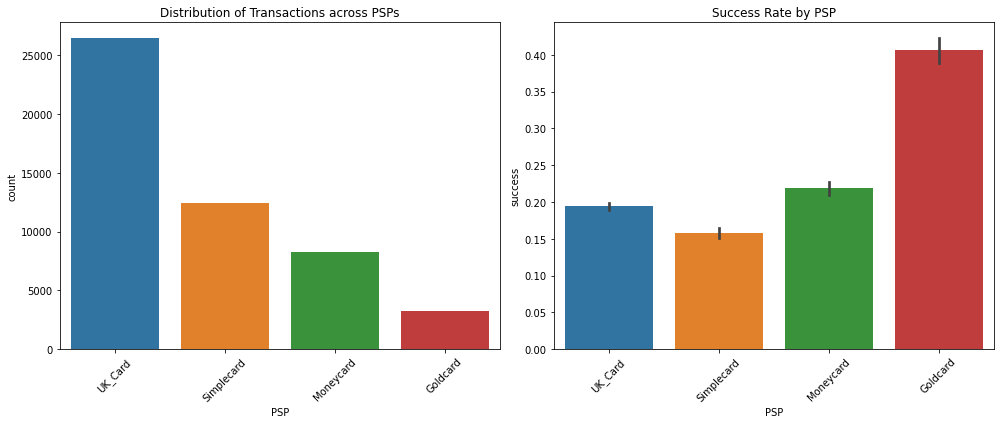

(          Unnamed: 0                           tmsp  country        amount  \
 count   50410.000000                          50410    50410  50410.000000   
 unique           NaN                            NaN        3           NaN   
 top              NaN                            NaN  Germany           NaN   
 freq             NaN                            NaN    30233           NaN   
 mean    25204.500000  2019-01-29 16:28:52.923269120      NaN    202.395715   
 min         0.000000            2019-01-01 00:01:11      NaN      6.000000   
 25%     12602.250000  2019-01-14 12:00:36.249999872      NaN    133.000000   
 50%     25204.500000     2019-01-30 15:20:07.500000      NaN    201.000000   
 75%     37806.750000     2019-02-13 01:09:50.500000      NaN    269.000000   
 max     50409.000000            2019-02-28 23:48:19      NaN    630.000000   
 std     14552.257872                            NaN      NaN     96.274730   
 
              success      PSP    3D_secured    ca

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data Quality Check
data_quality_report = data.describe(include='all', datetime_is_numeric=True)

# Descriptive Statistics
transaction_count = data.shape[0]
average_amount = data['amount'].mean()
success_rate = data['success'].mean() * 100

# Visualization - Distribution of Transactions across PSPs and Success Rate by PSP
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.countplot(x='PSP', data=data)
plt.title('Distribution of Transactions across PSPs')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.barplot(x='PSP', y='success', data=data)
plt.title('Success Rate by PSP')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

data_quality_report, transaction_count, average_amount, success_rate


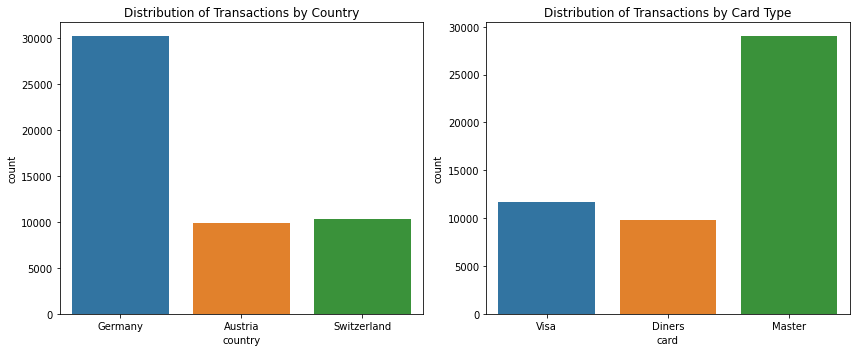

(success
 0    206.59345
 1    185.90438
 Name: amount, dtype: float64,
 3D_secured
 0    0.189562
 1    0.245525
 Name: success, dtype: float64)

In [3]:
# Further Data Exploration: Distribution by Country and Card Type

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(x='country', data=data)
plt.title('Distribution of Transactions by Country')

plt.subplot(1, 2, 2)
sns.countplot(x='card', data=data)
plt.title('Distribution of Transactions by Card Type')

plt.tight_layout()
plt.show()

# Analyzing the relationship between transaction amount, 3D security, and success rate
transaction_amount_vs_success = data.groupby('success')['amount'].mean()
security_vs_success = data.groupby('3D_secured')['success'].mean()

transaction_amount_vs_success, security_vs_success


# Descriptive Statistics

In [24]:
data.describe().iloc[:,1:]

,country,amount,success,PSP,3D_secured,card,hour,day_of_week,part_of_day,amount_category
count,50410.000000,50410.000000,50410.000000,50410.000000,50410.000000,50410.000000,50410.000000,50410.000000,50410.000000,50410.000000
mean,1.009899,202.395715,0.202896,2.233009,0.238266,1.037135,11.498869,2.759790,1.499207,1.523626
std,0.632588,96.274730,0.402160,0.943262,0.426027,0.650620,6.920537,1.917687,1.120172,0.752737
min,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,133.000000,0.000000,2.000000,0.000000,1.000000,5.000000,1.000000,0.000000,1.000000
50%,1.000000,201.000000,0.000000,3.000000,0.000000,1.000000,12.000000,3.000000,1.000000,2.000000
75%,1.000000,269.000000,0.000000,3.000000,0.000000,1.000000,17.000000,4.000000,3.000000,2.000000
max,2.000000,630.000000,1.000000,3.000000,1.000000,2.000000,23.000000,6.000000,3.000000,2.000000


# Feature Engineering

In [5]:
import numpy as np

# Feature Engineering
# Adding Time of Day and Day of the Week features
data['hour'] = data['tmsp'].dt.hour
data['day_of_week'] = data['tmsp'].dt.dayofweek

# Categorizing 'hour' into parts of the day
def categorize_hour(hour):
    if 0 <= hour < 6:
        return 'Night'
    elif 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

data['part_of_day'] = data['hour'].apply(categorize_hour)

# Categorizing 'amount' into low, medium, and high
amount_bins = [0, 100, 300, np.inf]
amount_labels = ['Low', 'Medium', 'High']
data['amount_category'] = pd.cut(data['amount'], bins=amount_bins, labels=amount_labels)

# View the updated dataset with new features
data[['tmsp', 'hour', 'day_of_week', 'part_of_day', 'amount', 'amount_category']].head()


,tmsp,hour,day_of_week,part_of_day,amount,amount_category
0,2019-01-01 00:01:11,0,1,Night,89,Low
1,2019-01-01 00:01:17,0,1,Night,89,Low
2,2019-01-01 00:02:49,0,1,Night,238,Medium
3,2019-01-01 00:03:13,0,1,Night,238,Medium
4,2019-01-01 00:04:33,0,1,Night,124,Medium


# Baseline Model

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier

# Preparing data for the baseline model
# Encoding categorical variables
label_encoders = {}
for column in ['country', 'PSP', 'card', 'part_of_day', 'amount_category']:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Selecting features and target variable for the model
X = data[['country', 'amount', '3D_secured', 'card', 'part_of_day', 'amount_category', 'hour', 'day_of_week']]
y = data['success']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creating and fitting the baseline Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

# Predicting and evaluating the model
y_pred_lr = lr_model.predict(X_test_scaled)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
report_lr = classification_report(y_test, y_pred_lr)

accuracy_lr, print(report_lr)


              precision    recall  f1-score   support

           0       0.81      1.00      0.89      8162
           1       0.00      0.00      0.00      1920

    accuracy                           0.81     10082
   macro avg       0.40      0.50      0.45     10082
weighted avg       0.66      0.81      0.72     10082



C:\Users\yagni\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yagni\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yagni\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.8095615949216425, None)

# Evaluation

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [17]:
cm = confusion_matrix(y_test, y_pred_lr)

In [18]:
plot_cm = ConfusionMatrixDisplay(cm)

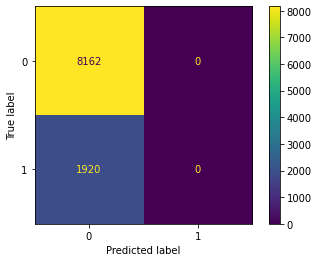

In [20]:
plot_cm.plot()

# Advanced Model (SMOTE)

In [9]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

# Addressing class imbalance using SMOTE (Synthetic Minority Over-sampling Technique)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Creating and fitting an advanced Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_smote, y_train_smote)

# Predicting and evaluating the model
y_pred_rf = rf_model.predict(X_test_scaled)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

accuracy_rf, print(report_rf)


              precision    recall  f1-score   support

           0       0.82      0.84      0.83      8162
           1       0.24      0.21      0.22      1920

    accuracy                           0.72     10082
   macro avg       0.53      0.52      0.53     10082
weighted avg       0.71      0.72      0.71     10082



(0.7224756992660186, None)

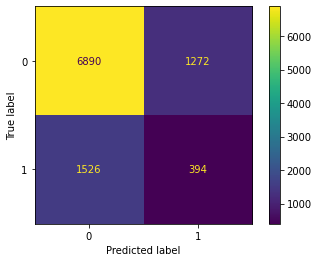

In [21]:
cm = confusion_matrix(y_test, y_pred_rf)

plot_cm = ConfusionMatrixDisplay(cm)

plot_cm.plot()

# Feature Importance(SMOTE)

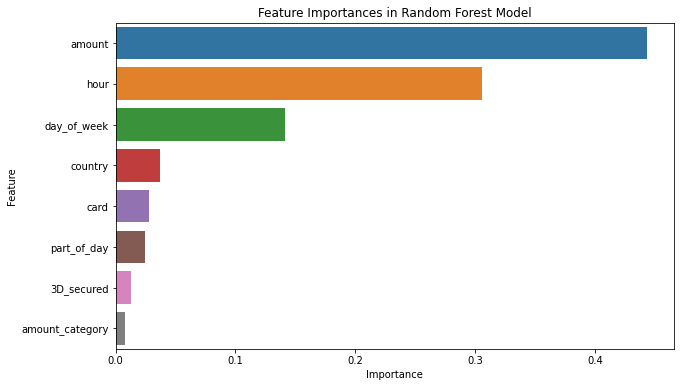

,Feature,Importance
1,amount,0.443230
6,hour,0.305969
7,day_of_week,0.141334
0,country,0.037139
3,card,0.027675
4,part_of_day,0.024185
2,3D_secured,0.012483
5,amount_category,0.007985


In [22]:
# Analyzing feature importance in the Random Forest model
feature_importances = rf_model.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sorting features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances in Random Forest Model')
plt.show()

feature_importance_df


# GUI

In [25]:
import tkinter as tk
from tkinter import ttk

# Function to handle the recommendation (to be linked with the model)
def recommend_psp():
    # Here you would add the logic to use the model for prediction
    # For the mockup, we're just displaying a placeholder text
    recommendation.set("Recommended PSP: [PSP Name]")

# Setting up the main window
root = tk.Tk()
root.title("PSP Recommendation System")

# Transaction details input
ttk.Label(root, text="Transaction Amount:").grid(column=0, row=0)
amount_entry = ttk.Entry(root)
amount_entry.grid(column=1, row=0)

ttk.Label(root, text="Country:").grid(column=0, row=1)
country_entry = ttk.Entry(root)
country_entry.grid(column=1, row=1)

ttk.Label(root, text="Card Type:").grid(column=0, row=2)
card_entry = ttk.Entry(root)
card_entry.grid(column=1, row=2)

# Recommendation button
recommend_button = ttk.Button(root, text="Recommend PSP", command=recommend_psp)
recommend_button.grid(column=1, row=3)

# Area to display the recommendation
recommendation = tk.StringVar()
recommendation_label = ttk.Label(root, textvariable=recommendation)
recommendation_label.grid(column=0, row=4, columnspan=2)

# Running the application
root.mainloop()
